In [1]:
import tensorflow as tf 
print(tf.__version__)
from tensorflow import keras 


2.10.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist 

In [5]:
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

9


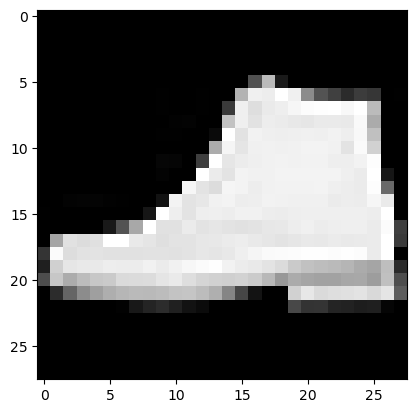

In [8]:
import matplotlib.pyplot as plt 
plt.imshow(train_images[42], cmap = 'gray' )
print(train_labels[42])

In [10]:
train_images , test_images = train_images/255.0 , test_images/255.0

# Model 1

In [11]:
import tensorflow as tf 
from tensorflow import keras 

fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

train_images , test_images = train_images/255.0 , test_images/255.0

model1 =keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),  # that the first layer in your network should be the same shape as your data
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10 , activation = tf.nn.softmax)   #the number of neurons in the last layer should match the number of classes you are classifying for
])

model1.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # optimizer = 'adam'
model1.fit(train_images, train_labels, epochs = 10 )   # 32 images in each batch

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4927 - accuracy: 0.8285
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3764 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3360 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3136 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2969 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2694 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2577 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2477 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.238

In [13]:
model1.evaluate(test_images , test_labels)
# print (type(test_images))

313/313 [==============================] - 2s 5ms/step - loss: 0.3500 - accuracy: 0.8795
<class 'numpy.ndarray'>


# model 2  - implementing callback

In [15]:
import tensorflow as tf 
from tensorflow import keras 
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

train_images , test_images = train_images/255.0 , test_images/255.0

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):   
        if(logs.get('accuracy')>0.90):     # with loss :if (logs.get('loss')< 0.4 )
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [17]:
callbacks = myCallback()

model2 =keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10 , activation = tf.nn.softmax)  
])
model2.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4990 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3733 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3364 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3107 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2932 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2797 - accuracy: 0.8957
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.9006
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2664 - accuracy: 0.9006


In [18]:
model2.evaluate(test_images, test_labels)


313/313 [==============================] - 2s 5ms/step - loss: 0.3498 - accuracy: 0.8777


[0.34980159997940063, 0.8776999711990356]

In [20]:
classifications = model2.predict(test_images)
print(classifications[0])  # It's the probability that this item is each of the 10 classes
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[7.1720696e-10 1.4901875e-09 4.2235507e-10 1.6956441e-11 3.2817407e-10
 1.5863881e-04 1.5779262e-08 2.0858347e-03 2.1209681e-08 9.9775547e-01]
9


# model 3 , with 1024 neurons in hidden layer

by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. 

In [21]:
import tensorflow as tf
print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist


(training_images, training_labels) ,  (test_images, test_labels) = fashion_mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model3.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model3.fit(training_images, training_labels, epochs= 10 )



2.10.0
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4705 - accuracy: 0.8302
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3568 - accuracy: 0.8713
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3207 - accuracy: 0.8817
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2953 - accuracy: 0.8915
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2783 - accuracy: 0.8967
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2618 - accuracy: 0.9011
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2490 - accuracy: 0.9066
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2394 - accuracy: 0.9109
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2276 - accuracy: 0.9140
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/s

In [22]:
model3.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3522 - accuracy: 0.8845


[0.35224753618240356, 0.8845000267028809]

In [23]:
classifications = model3.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 3ms/step
[1.2410725e-08 8.5114656e-15 4.2989965e-14 5.1120031e-15 4.0633165e-12
 9.2205082e-06 3.2147682e-10 1.0244994e-03 5.3828760e-12 9.9896622e-01]
9


# model 4 , with 2 hidden layers :512 , 256 

There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [24]:
import tensorflow as tf

fashion_mnist = keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fashion_mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model4 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model4.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model4.fit(training_images, training_labels, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4674 - accuracy: 0.8296
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3568 - accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3210 - accuracy: 0.8798
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2954 - accuracy: 0.8889
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2801 - accuracy: 0.8948
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2634 - accuracy: 0.9014
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2519 - accuracy: 0.9038
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2393 - accuracy: 0.9094
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2284 - accuracy: 0.9134
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step - l

In [25]:
model4.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3330 - accuracy: 0.8889


[0.3330107033252716, 0.8888999819755554]

In [26]:
classifications = model4.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 3ms/step
[2.2271522e-14 1.0758569e-11 3.6507755e-16 1.1050645e-12 1.6646899e-15
 8.2251552e-07 6.7519303e-13 8.7732697e-05 4.7902810e-14 9.9991143e-01]
9
